# Titanic

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
import qgrid
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

# 查看資料

In [4]:
data_train = pd.read_csv("C:/Users/WanPing/Desktop/python(Transcend)/ML/train for Titanic.csv")
data_test = pd.read_csv("C:/Users/WanPing/Desktop/python(Transcend)/ML/test for Titanic.csv")
data_submit = pd.read_csv('C:/Users/WanPing/Desktop/python(Transcend)/ML/gender_submission.csv')

qgrid.set_grid_option('maxVisibleRows',3)  #add filter on dataframe 
q = qgrid.show_grid(data_train)
q

#Sibsp: 二等親的數量
#Parch: 一等親的數量
#Embarked: 登船處

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
data_train.info()
#資料data_train的Age/Cabin/Embarked 有缺值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
data_train.describe()
#查看資料Train的分布
#平均0.383838人survived
#大都是2~3 pclass
#平均年齡為29.699
#計算此部分時, 會忽略缺值

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_test.info()
#資料Test的Age/Fare/Cabin 有缺值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [9]:
data_test.describe()
#查看資料Test的分布

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
data_all = data_train.append(data_test)
data_all.reset_index(inplace=True, drop=True)  #合併則index會有重複的問題, 故將其重新設定
qgrid.set_grid_option('maxVisibleRows', 3)
data_q = qgrid.show_grid(data_all)
data_q

#將data_train跟data_test合併為整體的資料群

C:\Users\WanPing\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
data_all.info()
#資料全體的Age/Fare/Emarked/Cabin 有缺值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


# 資料分析

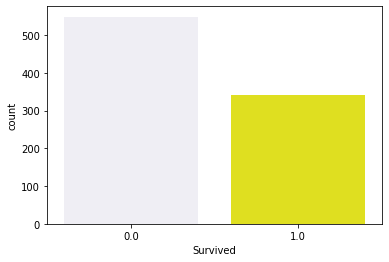

In [12]:
sns.countplot(data_all['Survived'],palette=["#efedf5","yellow"])
#約300+人獲救

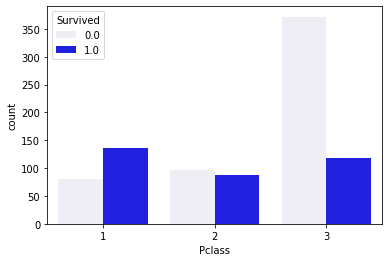

In [13]:
sns.countplot(data_all['Pclass'], hue=data_all['Survived'],palette=["#efedf5","blue"])
#存活率: Pclass-1  > Pclass-2  >  Pclass-3     ,故推測存活率跟金錢地位可能有關

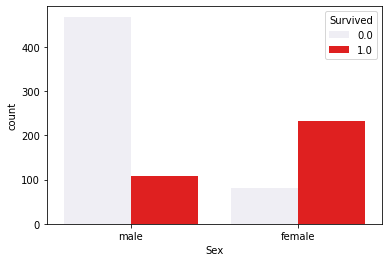

In [14]:
sns.countplot(data_all['Sex'], hue=data_all['Survived'],palette=["#efedf5","red"])
#存活率: 女性 > 男性

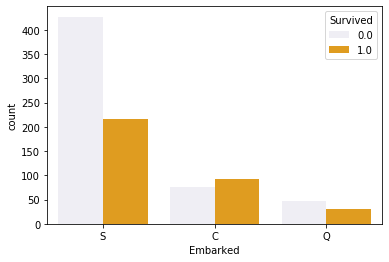

In [16]:
sns.countplot(data_all['Embarked'], hue=data_all['Survived'],palette=["#efedf5","orange"])
#存活率: C登船處 > Q登船處 > S登船處

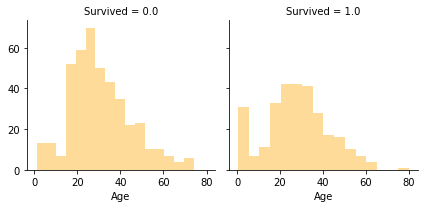

In [17]:
g = sns.FacetGrid(data_all, col='Survived')
g.map(sns.distplot, 'Age', kde=False,color='orange')
#存活率: 年紀小 > 年紀大

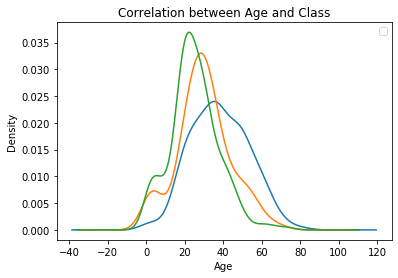

In [18]:
#倉別和年齡的關係
#plt.subplot2grid((2,3),(1,0),colspan=2)
plt.legend(('1-class','2-class','3-class'),loc='best')
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u'Age')
plt.ylabel(u'Density')
plt.title(u'Correlation between Age and Class')
plt.show()

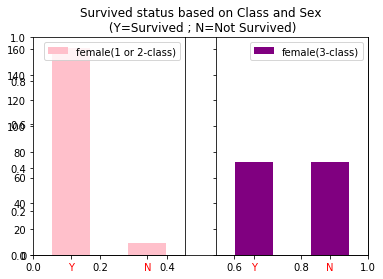

In [19]:
#各艙別中的女性存活率
fig=plt.figure()
plt.title(u'Survived status based on Class and Sex\n (Y=Survived ; N=Not Survived)')
ax1=fig.add_subplot(1,2,1)  #繪圖網格參數: 1x2網格的第1格
data_train.Survived[data_train.Sex=='female'][data_train.Pclass !=3].value_counts().plot(kind='bar'
                                                                                        ,label='female(1-Class or 2-Class)'
                                                                                        ,color='pink')
ax1.set_xticklabels([u'Y',u'N'], rotation=0,color='red')
ax1.legend([u'female(1 or 2-class)'],loc='best')

ax2=fig.add_subplot(1,2,2,sharey=ax1)  #繪圖網格參數: 1x2網格的第2格
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar'
                                                                                           ,label='female(3-Class)',color='purple')
ax2.set_xticklabels([u'Y',u'N'],rotation=0,color='red')
plt.legend([u'female(3-class)'],loc='best')

plt.show()

# 存活率: 1-class & 2-class 的女性  >  3-class的女性

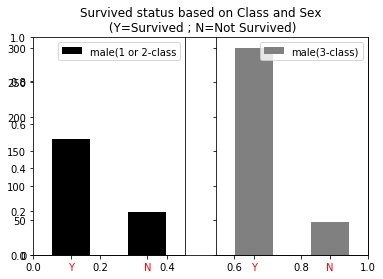

In [20]:
#各艙別中的男性存活率
fig=plt.figure()
plt.title(u'Survived status based on Class and Sex\n (Y=Survived ; N=Not Survived)')
ax3=fig.add_subplot(1,2,1) #圖網格參數: 1x2網格的第1格
data_train.Survived[data_train.Sex =='male'][data_train.Pclass !=3].value_counts().plot(kind='bar'
                                                                                       ,label='male(1-class or 2-class)'
                                                                                       ,color='black')
ax3.set_xticklabels([u'Y',u'N'],rotation=0,color='red')
plt.legend([u'male(1 or 2-class'],loc='best')

ax4=fig.add_subplot(1,2,2,sharey=ax3) #繪圖網格參數: 1x2網格的第2格
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar'
                                                                                          ,label='male(3-Class)'
                                                                                          ,color='grey')
ax4.set_xticklabels([u'Y',u'N'],rotation=0,color='red')
plt.legend([u'male(3-class)'],loc='best')
plt.show()

# 存活率: 1-class & 2-class 的男性  >  3-class的男性

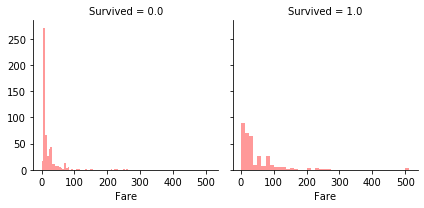

In [21]:
g = sns.FacetGrid(data_all, col='Survived')
g.map(sns.distplot, 'Fare', kde=False,color='red')
#存活率: high fare > low fare

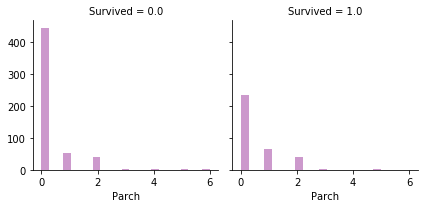

In [22]:
g = sns.FacetGrid(data_all, col='Survived')
g.map(sns.distplot, 'Parch', kde=False,color='purple')
#Parch: 一等親的數量

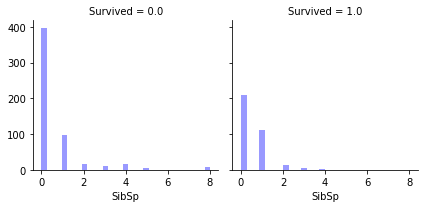

In [23]:
g = sns.FacetGrid(data_all, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False,color='blue')
#Sibsp: 二等親的數量

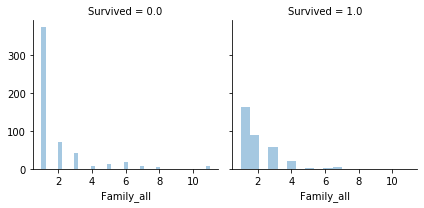

In [24]:
data_all['Family_all'] = data_all['Parch'] + data_all['SibSp']+1
g = sns.FacetGrid(data_all, col='Survived')
g.map(sns.distplot, 'Family_all', kde=False)
#存活率: 有帶親人的乘客 > 獨自登船的乘客

# Feature engineering
為機器學習算法創造新特徵
rf.: https://kknews.cc/zh-tw/tech/532rj23.html

In [25]:
#用稱謂來做特徵工程: 特徵工程 Title
data_all['Title']=data_all['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
data_all.groupby(['Title'])['Age'].mean()

#Master的平均才8歲  
#Capt的平均年紀最大為70歲
#Capt / Col / Don / Dona /Jonkheer/Lady / Mlle / Mme / Sir /the Countess (推測: 此為整數.可能只有一位)


Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [26]:
data_all['Title'].value_counts()
#Mr的有757位~ 超多!
#證明上面的推測正確  #Capt / Col / Don / Dona /Jonkheer/Lady / Mlle / Mme / Sir /the Countess (推測: 此為整數.可能只有一位)

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Don               1
Capt              1
the Countess      1
Lady              1
Dona              1
Mme               1
Sir               1
Name: Title, dtype: int64

In [44]:
data_all['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Ms', 'Don', 'Rev', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

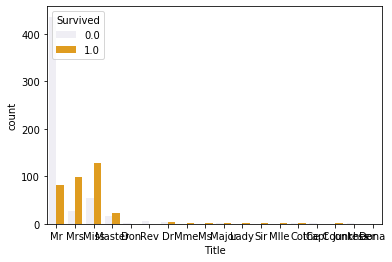

In [27]:
sns.countplot(data_all['Title'], hue=data_all['Survived'],palette=["#efedf5","orange"])
#個別稱謂的生存狀況

In [28]:
#簡化個別稱謂~類似的歸一類 : 特徵工程 Title2
Title2={}
Title2['Mr']='Mr'
Title2['Miss']='Miss'
Title2['Master']='Master'
Title2['Jonkheer']='Master'
Title2['Mme']='Mrs'
Title2['Mrs']='Mrs'
Title2['Ms']='Mrs'
Title2['Don']='noble'
Title2['Sir']='noble'
Title2['Lady']='noble'
Title2['Donay']='noble'
Title2['the Countess']='noble'
Title2['Rev']='staff'
Title2['Dr']='staff'
Title2['Col']='staff'
Title2['Major']='staff'
Title2['Capt']='staff'

data_all['Title2']=data_all['Title'].map(Title2)
data_all['Title2'].value_counts()

Mr        757
Miss      260
Mrs       200
Master     62
staff      23
noble       4
Name: Title2, dtype: int64

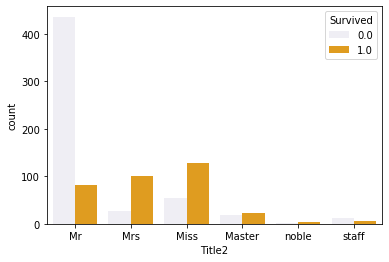

In [29]:
#簡化稱謂後的生存狀況
sns.countplot(data_all['Title2'], hue=data_all['Survived'],palette=["#efedf5","orange"])

#看起來 Mrs / Miss / Master 的存活機率比較大 (皆為女性及小孩的稱謂)

In [32]:
# 查看票號是否有相同的, 有可能同號會在一起, 生存機率也會有相連性   : 特徵工程  Ticket_info
Ticket_count={}
Ticket_count=data_all['Ticket'].value_counts()
Ticket_count
#共929種票號
#有相同的票號, 可能是包廂

CA. 2343             11
1601                  8
CA 2144               8
3101295               7
PC 17608              7
347082                7
347077                7
S.O.C. 14879          7
113781                6
382652                6
19950                 6
347088                6
220845                5
4133                  5
PC 17757              5
16966                 5
349909                5
W./C. 6608            5
113503                5
C.A. 2315             4
2666                  4
C.A. 34651            4
PC 17483              4
PC 17755              4
230136                4
12749                 4
SC/Paris 2123         4
LINE                  4
24160                 4
17421                 4
                     ..
345779                1
349207                1
A/5 21175             1
347070                1
312992                1
234818                1
392092                1
347081                1
341826                1
343271                1
C 7077          

In [37]:
data_all['Ticket_info']=data_all['Ticket'].map(Ticket_count)  #將同票號的的數量當作是類別號 ,灌入個別乘客的資料中
data_all['Ticket_info']

0       1
1       2
2       1
3       2
4       1
5       1
6       2
7       5
8       3
9       2
10      3
11      1
12      1
13      7
14      1
15      1
16      6
17      1
18      2
19      1
20      2
21      1
22      1
23      1
24      5
25      7
26      1
27      6
28      1
29      1
       ..
1279    1
1280    5
1281    4
1282    2
1283    3
1284    1
1285    3
1286    2
1287    1
1288    2
1289    1
1290    1
1291    4
1292    2
1293    2
1294    2
1295    1
1296    1
1297    1
1298    5
1299    1
1300    3
1301    1
1302    3
1303    1
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket_info, Length: 1309, dtype: int64

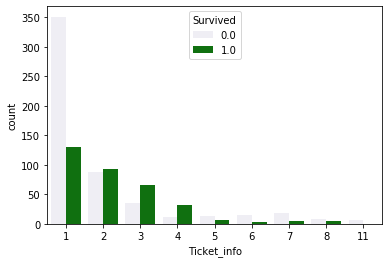

In [40]:
sns.countplot(data_all['Ticket_info'], hue=data_all['Survived'],palette=["#efedf5","green"])

#結果: 包廂4人 和 包廂3人 的生存率較高
#5人以上的群組: 可能在人多慌亂或互相找尋的情況下, 影響生存的機率
#2人以下的群組: 可能在無人幫助或缺乏逃生機會的情況下, 影響生存的機率

# 遺失值的處理

In [41]:
#缺失值: embarked  僅有2筆缺失值. 則用眾數填入
data_all['Embarked'] = data_all['Embarked'].fillna('S')
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_all     1309 non-null int64
Title          1309 non-null object
Title2         1306 non-null object
Ticket_info    1309 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 127.9+ KB


In [42]:
#缺失值:Fare 僅有一筆缺失值. 則用平均值填入
data_all['Fare'] = data_all['Fare'].fillna(data_all['Fare'].mean())
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_all     1309 non-null int64
Title          1309 non-null object
Title2         1306 non-null object
Ticket_info    1309 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 127.9+ KB


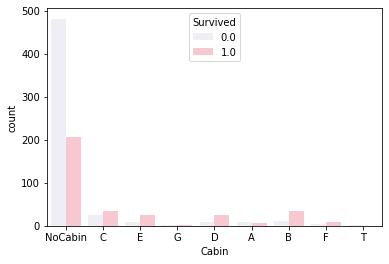

In [43]:
data_all["Cabin"] = data_all['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data_all["Cabin"].unique()
sns.countplot(data_all['Cabin'], hue=data_all['Survived'],palette=["#efedf5","pink"])

In [47]:
data_all['Sex'] = data_all['Sex'].astype('category').cat.codes
data_all['Embarked'] = data_all['Embarked'].astype('category').cat.codes
data_all['Pclass'] = data_all['Pclass'].astype('category').cat.codes
data_all['Title'] = data_all['Title'].astype('category').cat.codes
data_all['Title2'] = data_all['Title2'].astype('category').cat.codes
data_all['Cabin'] = data_all['Cabin'].astype('category').cat.codes
data_all['Ticket_info'] = data_all['Ticket_info'].astype('category').cat.codes

dataAgeNull = data_all[data_all["Age"].isnull()]
dataAgeNotNull = data_all[data_all["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_all"]-dataAgeNotNull["Family_all"].mean())>(4*dataAgeNotNull["Family_all"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_all', 'Title', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data_all = dataAgeNull.append(dataAgeNotNull)
data_all.reset_index(inplace=True, drop=True)

dataTrain = data_all[pd.notnull(data_all['Survived'])].sort_values(by=["PassengerId"])
dataTest = data_all[~pd.notnull(data_all['Survived'])].sort_values(by=["PassengerId"])

dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_all', 'Title',
       'Title2', 'Ticket_info'],
      dtype='object')

In [48]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_all','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_all','Cabin']]
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_all,Cabin
263,0.0,22.000000,2,7.2500,2,1,2,7
264,1.0,38.000000,0,71.2833,0,0,2,2
265,1.0,26.000000,2,7.9250,2,0,1,7
266,1.0,35.000000,2,53.1000,0,0,2,2
267,0.0,35.000000,2,8.0500,2,1,1,7
0,0.0,37.057746,1,8.4583,2,1,1,7
268,0.0,54.000000,2,51.8625,0,1,1,4
269,0.0,2.000000,2,21.0750,2,1,5,7
270,1.0,27.000000,2,11.1333,2,0,3,7
271,1.0,14.000000,0,30.0708,1,0,2,7


# Training

In [53]:
from sklearn.ensemble import RandomForestClassifier
 
data_rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

data_rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("oob score: %.3f" % data_rf.oob_score_)

oob score: 0.824


In [51]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(data_rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.355539
2,Fare,0.190575
0,Age,0.179913
3,Pclass,0.091058
6,Cabin,0.079544
5,Family_all,0.072525
1,Embarked,0.030845


# submit

In [55]:
#rf_res =rf.predict(dataTest)
data_submit['Survived'] = data_rf.predict(dataTest)
data_submit['Survived'] = data_submit['Survived'].astype(np.int)
data_submit.to_csv('/Users/WanPing/Desktop/python(Transcend)/ML/data_submit.csv', index= False)

In [56]:
data_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
